In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
# Читаем данные
data = pd.read_csv('data.csv')
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
# Проверяем данные на наличие NaN
data.isna().sum()

# Проверяем типы данных в колонках
data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [4]:
# Разделяем предикторы и отклик
# Y = pd.get_dummies(data.Quality, dtype=int)
Y = data.Quality
X = data.drop('Quality', axis=1)

# Разделяем на обучающую выборку и выборку валидации
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1337)

In [5]:
# Инициализируем модель
# model = tree.DecisionTreeClassifier(random_state=1337,
#                                     # функция для impurity ('gini' или 'entropy')
#                                     criterion='entropy',
#                                     # максимальная глубина дерева
#                                     max_depth=3,
#                                     # минимальное число элементов в узле для разбиения (может быть долей)
#                                     min_samples_split=3,
#                                     # минимальное число элементов в листе (может быть долей)
#                                     min_samples_leaf=3,
#                                     # минимальное значение дельты impurity
#                                     # min_impurity_decrease=0,
#                                     # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
#                                     # поддерживает опцию 'balanced'.
#                                     class_weight=None,
#                                     )
model = tree.DecisionTreeClassifier(random_state=1337, criterion='entropy')

# Обучаем модель
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1337)

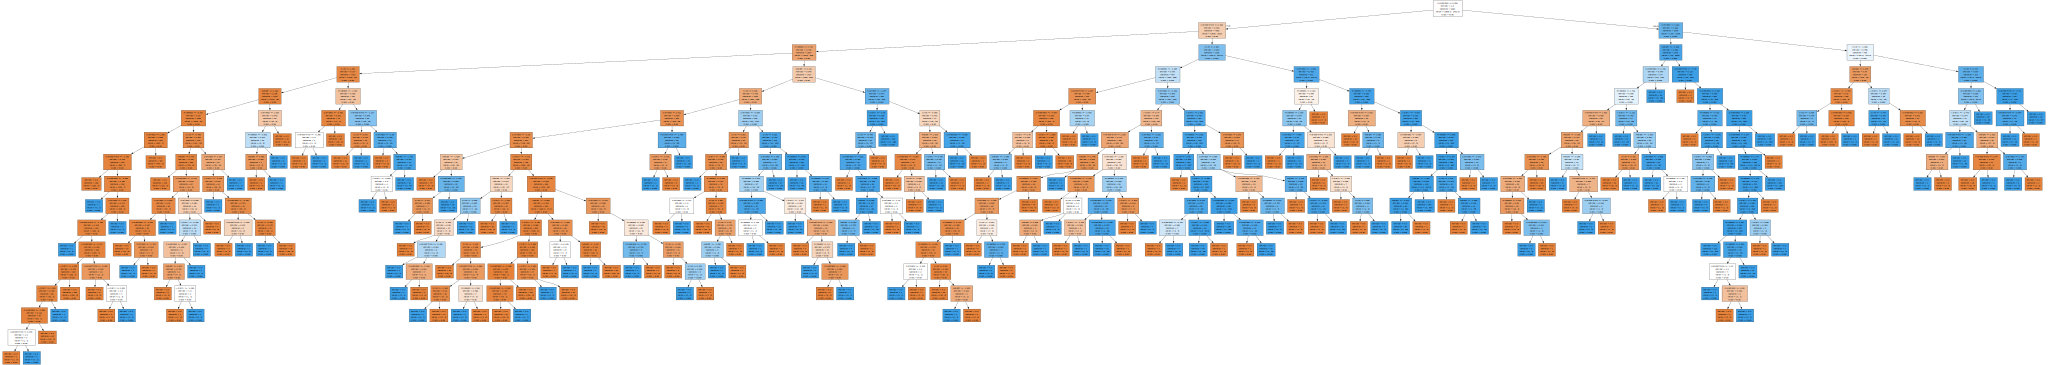

In [6]:
# Визуализируем модель
from IPython.display import SVG, display, HTML
from graphviz import Source

style = "<style>svg{width: 20% !important; height : 20% ! important; }</style>"
HTML(style)

graph = Source(tree.export_graphviz(model,
                                    out_file=None,
                                    feature_names=X.columns,
                                    class_names=['Bad', 'Good'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))